### Assignment 4

In [1]:
def calculate_si_amount(principal, rate, time):
    interest = principal*rate*time/100
    return principal + interest

In [2]:
calculate_si_amount(1859, 1.67, 5)

2014.2265

In [3]:
def calculate_sum(*args):
    my_sum = 0
    for param in args:
        my_sum += param
    return my_sum

In [4]:

calculate_sum(1, 2, 3, 4, 5, 6)

21

In [5]:
calculate_sum(34, 73.8, 28, 78)

213.8

### `sklearn` datasets

In [6]:
from sklearn.datasets import load_diabetes

In [7]:
diabetes = load_diabetes(as_frame=True)

In [8]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [9]:
diabetes_df = diabetes.frame

In [10]:
diabetes_df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [11]:
diabetes_df.shape

(442, 11)

In [12]:
# X, y = diabetes.data, diabetes.target

In [13]:
X = diabetes_df[['age']]
y = diabetes_df['bmi']

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X, y)

LinearRegression()

In [17]:
simple_preds = lr.predict(X)

In [18]:
print(f'Intercept: {lr.intercept_}\nCoef: {lr.coef_}\nScore: {lr.score(X, y)}')

Intercept: -7.34031317064707e-16
Coef: [0.18508467]
Score: 0.03425633364258207


In [19]:
X = diabetes_df[['age', 'bmi']]
y = diabetes_df['bp']

In [20]:
multiple_prediction = LinearRegression()
multiple_prediction.fit(X, y)

LinearRegression()

In [21]:
def print_results(model):
    return print(f'''Intercept: {model.intercept_}
    Coef: {model.coef_}
    Score: {model.score(X, y)}''')

In [22]:
print_results(multiple_prediction)

Intercept: 5.044203447478034e-16
    Coef: [0.27154348 0.34515679]
    Score: 0.22756321849118344


In [23]:
preds = multiple_prediction.predict(X)

In [24]:
import matplotlib.pyplot as plt

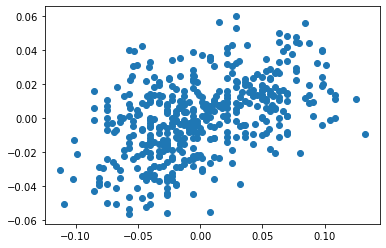

In [25]:
plt.scatter(y, preds)

In [26]:
Housing = {'Year': [2017]*4 + [2018]*3 + [2019]*2,
          'Income (K)': [67, 78, 69, 130, 95, 113, 99, 178, 156],
          'Bedrooms': [2, 1, 1, 2, 2, 2, 3, 4, 3],
          'Bathrooms': [1, 1, 2, 2, 1, 2, 1, 3, 2]}

In [27]:
import pandas as pd

In [28]:
df = pd.DataFrame(Housing)

In [29]:
df

,Year,Income (K),Bedrooms,Bathrooms
0,2017,67,2,1
1,2017,78,1,1
2,2017,69,1,2
3,2017,130,2,2
4,2018,95,2,1
5,2018,113,2,2
6,2018,99,3,1
7,2019,178,4,3
8,2019,156,3,2


In [30]:
#pip install -U statsmodels

In [31]:
import statsmodels.api as sm

In [35]:
X = sm.add_constant(df['Bedrooms'])

In [36]:
X

,const,Bedrooms
0,1.0,2
1,1.0,1
2,1.0,1
3,1.0,2
4,1.0,2
5,1.0,2
6,1.0,3
7,1.0,4
8,1.0,3


In [38]:
model = sm.OLS(df['Year'], X).fit()

In [39]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Year   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     16.82
Date:                Mon, 04 Oct 2021   Prob (F-statistic):            0.00456
Time:                        18:36:36   Log-Likelihood:                -5.0880
No. Observations:                   9   AIC:                             14.18
Df Residuals:                       7   BIC:                             14.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2016.1765      0.422   4774.450      0.0

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [43]:
X = df[['Year', 'Income (K)']]

In [44]:
multi_model = sm.OLS(df['Bedrooms'], X).fit()

In [45]:
multi_model.summary()

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Bedrooms   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              67.37
Date:                Mon, 04 Oct 2021   Prob (F-statistic):                    2.68e-05
Time:                        18:39:14   Log-Likelihood:                         -7.1273
No. Observations:                   9   AIC:                                      18.25
Df Residuals:                       7   BIC:                                      18.65
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year       -2.009e-06      0.000     -0.006      0.995      -0.001       0.001
Income (K)     0.0203      0.006      3.683      0.008       0.007       0.033
==============================================================================
Omnibus:                        1.058   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.589   Jarque-Bera (JB):                0.804
Skew:                           0.537   Prob(JB):                        0.669
Kurtosis:                       2.005   Cond. No.                         55.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
airfoil_df = pd.read_csv('data/airfoil_self_noise.dat', sep = '\t', header=None, index_col = None,
           names = ['freq', 'angle', 'chord', 'velocity', 'suction', 'db'])

In [57]:
import seaborn as sns

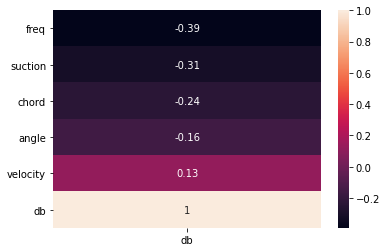

In [62]:
sns.heatmap(airfoil_df.corr()[['db']].sort_values(by = 'db'), annot = True)

In [73]:
X = airfoil_df[['freq']]
y = airfoil_df['db']

In [74]:
lr1 = LinearRegression()
lr1.fit(X, y)

LinearRegression()

In [75]:
lr1.score(X, y)

0.1526554072390255

In [83]:
lr2 = LinearRegression()
X2 = airfoil_df[['angle', 'chord']]
lr2.fit(X2, y)

LinearRegression()

In [86]:
lr3 = LinearRegression()
X3 = airfoil_df[['angle', 'chord', 'velocity']]
lr3.fit(X3, y)

LinearRegression()

In [87]:
lr2.score(X2, y)

0.1575172071506743

In [88]:
lr3.score(X3, y)

0.17965442691539202

In [89]:
from sklearn.metrics import mean_squared_error, 

In [93]:
mean_squared_error(lr1.predict(X), y, squared=False)

6.348191742929222

In [94]:
mean_squared_error(lr2.predict(X2), y, squared=False)

6.3299535684752275

In [95]:
mean_squared_error(lr3.predict(X3), y, squared=False)

6.246236503648347

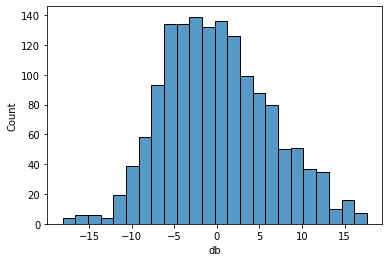

In [97]:
resids = lr3.predict(X3) - y
sns.histplot(resids)

In [100]:
import numpy as np

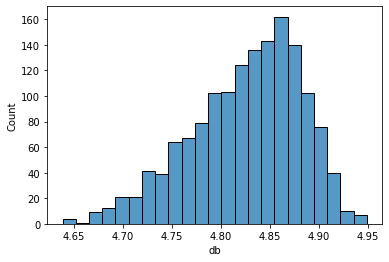

In [101]:
sns.histplot(np.log(y))

In [103]:
#pip install gapminder

In [108]:
from gapminder import gapminder
gapminder.head(15)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [109]:
seventy_two = gapminder.loc[gapminder['year']== 2007]

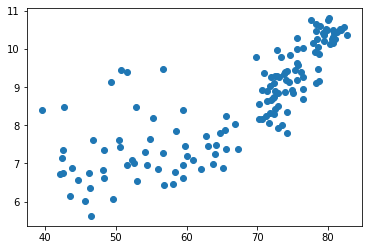

In [115]:
plt.scatter(seventy_two['lifeExp'], np.log(seventy_two['gdpPercap']))

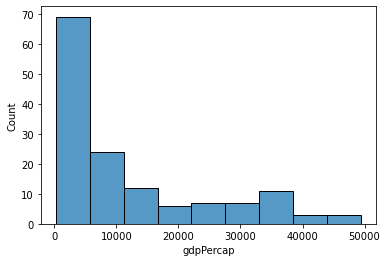

In [112]:
sns.histplot(seventy_two['gdpPercap'])

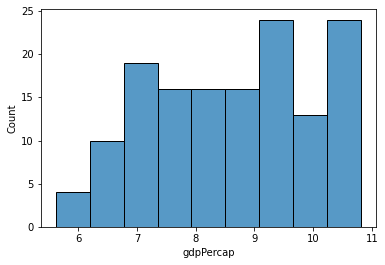

In [113]:
sns.histplot(np.log(seventy_two['gdpPercap']))